Processing a dataset that contains both images and other features such as integers, strings, datetime, and binary datatypes requires a multi-step approach to ensure all features are properly handled and integrated.

### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime, time

In [2]:
import cv2

### Step 2: Load and Prepare the Data

In [3]:
data = pd.read_csv('merged_intersections.csv')

In [4]:
data.sample(4)

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,pre_link,post_link,full_streetview_link,geocode_source,...,data_loaded_at,analysis_neighborhood,supervisor_district,police_district,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods,image_path
6741,510429,24020000,785000.0,230852752.0,37.764511,-122.407040,https://www.google.com/maps/@,",70m/data=!3m1!1e3?","https://www.google.com/maps/@37.764510758452,-...",SFPD-INTERIM DB,...,2024-03-10 13:58:50,Mission,10.0,MISSION,3.0,9.0,20.0,54.0,54.0,resized_images\24020000.png
22506,71725,24088000,9125000.0,200749593.0,37.752267,-122.418448,https://www.google.com/maps/@,",70m/data=!3m1!1e3?","https://www.google.com/maps/@37.7522668498,-12...",SFPD-INTERIM DB,...,2024-03-10 13:58:50,Mission,9.0,MISSION,3.0,2.0,20.0,53.0,53.0,resized_images\24088000.png
32370,34926,23308000,8045101.0,3431242.0,37.729094,-122.492598,https://www.google.com/maps/@,",70m/data=!3m1!1e3?","https://www.google.com/maps/@37.7290943141772,...",SFPD-CROSSROADS,...,2024-03-10 13:58:50,Sunset/Parkside,4.0,TARAVAL,10.0,8.0,35.0,43.0,43.0,resized_images\23308000.png
29839,49840,20875000,NaN,150637476.0,37.723173,-122.410500,https://www.google.com/maps/@,",70m/data=!3m1!1e3?","https://www.google.com/maps/@37.7231728285608,...",SFPD-CROSSROADS,...,2024-03-10 13:58:50,Portola,9.0,BAYVIEW,2.0,2.0,25.0,91.0,91.0,resized_images\20875000.png


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76306 entries, 0 to 76305
Data columns (total 100 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   unique_id                     76306 non-null  int64  
 1   cnn_intrsctn_fkey             76306 non-null  int64  
 2   cnn_sgmt_fkey                 32733 non-null  float64
 3   case_id_pkey                  76304 non-null  float64
 4   tb_latitude                   76306 non-null  float64
 5   tb_longitude                  76306 non-null  float64
 6   pre_link                      76306 non-null  object 
 7   post_link                     76306 non-null  object 
 8   full_streetview_link          76306 non-null  object 
 9   geocode_source                76306 non-null  object 
 10  geocode_location              76306 non-null  object 
 11  collision_datetime            76306 non-null  object 
 12  collision_date                76306 non-null  object 
 13  

In [6]:
if isinstance(data, pd.DataFrame):
    print("The dataset is a pandas DataFrame.")
else:
    print("The dataset is NOT a pandas DataFrame.")

The dataset is a pandas DataFrame.


## DATA CLEANING PHASE 1

Identify columns with many null values and decide on a strategy to handle them.

Drop Columns with Many Nulls: If certain columns have a significant number of null values and are not crucial,
consider dropping them.

Impute missing values using appropriate strategies for columns we want to keep

In [7]:
#Dropping unnecessary columns
columns_to_drop = [
    "geocode_source", "juris", "officer_id", "beat_number", "vz_pcf_code", "vz_pcf_link",
    "street_view", "party_number_ckey", "victim_id", "data_as_of",
    "data_updated_at", "data_loaded_at","Current Police Districts", "Current Supervisor Districts",
    "Analysis Neighborhoods", "Neighborhoods", "SF Find Neighborhoods", 
    "oaf_viol_section", "oaf_violation_code", "oaf_violation_suffix","special_info_f",
    "special_info_g","stwd_vehicle_type","geocode_location","collision_datetime",
    "intersection","victim_ejected","victim_seating_position","victim_safety_equip_1",
        "victim_safety_equip_2", "point","supervisor_district",'pre_link', 'vehicle_year', 'post_link', 'full_streetview_link','collision_datetime'
]

data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Display remaining columns and shape after dropping
remaining_columns = data.columns
df_shape_after_dropping = data.shape

remaining_columns, df_shape_after_dropping

(Index(['unique_id', 'cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
        'tb_latitude', 'tb_longitude', 'collision_date', 'collision_time',
        'accident_year', 'month', 'day_of_week', 'time_cat',
        'reporting_district', 'primary_rd', 'secondary_rd', 'distance',
        'direction', 'weather_1', 'weather_2', 'collision_severity',
        'type_of_collision', 'mviw', 'ped_action', 'road_surface',
        'road_cond_1', 'road_cond_2', 'lighting', 'control_device',
        'vz_pcf_description', 'number_killed', 'number_injured', 'dph_col_grp',
        'dph_col_grp_description', 'party_type', 'at_fault', 'party_sex',
        'party_age', 'party_sobriety', 'party_drug_physical', 'dir_of_travel',
        'party_safety_equip_1', 'party_safety_equip_2', 'finan_respons',
        'sp_info_1', 'sp_info_2', 'sp_info_3', 'oaf_viol_cat', 'oaf_1', 'oaf_2',
        'party_number_killed', 'party_number_injured', 'move_pre_acc',
        'vehicle_make', 'race', 'inattention', 'street_

data.drop(['pre_link', 'vehicle_year', 'post_link', 'full_streetview_link'], inplace=True, errors='ignore')

In [8]:
# Assuming your DataFrame is named 'data'
missing_case_id_rows = data[data['case_id_pkey'].isna()]

# To display the rows where 'case_id_pkey' is NaN
print(missing_case_id_rows['case_id_pkey'])

59454   NaN
74092   NaN
Name: case_id_pkey, dtype: float64


In [9]:
# Generate a new unique value based on the maximum value in the column
max_value = data['case_id_pkey'].max()
new_value_1 = max_value + 1
new_value_2 = max_value + 2

# Fill the missing values with the new unique values
data.loc[data['case_id_pkey'].isna(), 'case_id_pkey'] = [new_value_1, new_value_2]

Step 2: Convert Data Types
Convert columns to appropriate data types if necessary.

In [10]:
# Convert negative age values to positive in 'party_age' and 'victim_age'
data['party_age'] = data['party_age'].abs()
data['victim_age'] = data['victim_age'].abs()


# Replace NaN with 0 and inf with a large number or -1
data[['party_age', 'victim_age' ]] = data[['party_age', 'victim_age' ]].fillna(0)  # Replace NaN with 0
data[['party_age', 'victim_age' ]] = data[['party_age', 'victim_age' ]].replace(np.inf, -1)  # Replace inf with -1


# Clean the victim_age column
data = data[(data['victim_age'].astype(int) <= 100) & (data['victim_age'].astype(int) >= 1)]

# Clean the party_age column
data = data[(data['party_age'].astype(int) <= 100) & (data['party_age'].astype(int) >= 16)]


# Convert to integer and filter out unrealistic years in 'vehicle_year' column
#df['vehicle_year'] = pd.to_numeric(df['vehicle_year'], errors='coerce')  # Convert all values to numeric
#df['vehicle_year'] = df['vehicle_year'].apply(lambda x: x if (x >= 1900 and x <= 2024) else None)  # Set out-of-range to NaN
data['victim_age'] = pd.to_numeric(data['victim_age'], errors='coerce').fillna(0).astype(int)
data['party_age'] = pd.to_numeric(data['party_age'], errors='coerce').fillna(0).astype(int)
data['number_killed'] = pd.to_numeric(data['number_killed'], errors='coerce').fillna(0).astype(int)

# Replace null values in 'oaf_viol_cat' with "Not Stated"
# data['oaf_viol_cat'].fillna("Not Stated", inplace=True)


# make'inattention' values more readable
data['inattention'] = data['inattention'].replace({
    "Cell Phone Hands Free": "Cellphone Handsfree", 
    "Unknown": "Not Stated", 
    " Cell Phone": "Cell Phone Handheld", 
    "Electronic Equip": "Electronic Equipment"
})

# Replace NaN and 'Not Stated' values with 'Other' in the 'oaf_2' column
data['oaf_2'] = data['oaf_2'].replace(['Not Stated', None], 'Other').fillna('Other')

#  Replace NaNs in 'street_of_travel' with "Not Stated" and standardize values
data['street_of_travel'] = data['street_of_travel'].replace({"Not Collected": "Not Stated"}).fillna("Not Stated")

#  Replace " Not Collected" in 'vehicle_autonomous' with "Not Stated"
data['vehicle_autonomous'] = data['vehicle_autonomous'].replace({"Not Collected": "Not Stated"})

# Replace " -" in 'vehicle_make' with "Unknown"
data['vehicle_make'] = data['vehicle_make'].replace({"-": "Unknown"})

#  Replace 'not stated' in 'weather_1'' with "other"
data['weather_1'] = data['weather_1'].replace({'not stated': 'other'})

#  Replace 'not stated' in 'type_of_collision'' with "other"
data['type_of_collision'] = data['type_of_collision'].replace({'not stated': 'other'})

In [11]:
data['oaf_viol_cat'] = data['oaf_viol_cat'].fillna("Not Stated")

In [12]:
#  'party_safety_equip_2' - replace NaNs and "None Stated" and "Not Stated" with Other
data['party_safety_equip_2'] = data['party_safety_equip_2'].replace({"None Stated": "Other", "Not Stated": "Other"}).fillna("Other")

#  'collision_time' - replace NaN values with "12:00:00 AM"
#"12:00:00 AM" is a logical placeholder when no time is available.
data['collision_time'] = data['collision_time'].fillna("12:00:00 AM")

#  'secondary_rd' - replace NaNs with "Not Stated"
data['secondary_rd'] = data['secondary_rd'].fillna("Not Stated")

# Replace NaN and 'Not Stated' values with 'Other' in the 'weather_2' column
data['weather_2'] = data['weather_2'].replace(['Not Stated', None], 'Other').fillna('Other')

# dph_col_grp_description' - replace NaNs with "Unknown/Not Stated"
data['dph_col_grp_description'] = data['dph_col_grp_description'].fillna("Unknown/Not Stated")

# 'party_drug_physical' - replace NaNs with "Not Stated"
data['party_drug_physical'] = data['party_drug_physical'].fillna("Not Stated")

# 'party_safety_equip_1' - replace NaNs with "Not Stated"
data['party_safety_equip_1'] = data['party_safety_equip_1'].fillna("Not Stated")


In [13]:
# Remove time component and preserve as object (string)
data['collision_date'] = data['collision_date'].str.split(' ').str[0]

# Convert 'collision date' to datetime to extract the weekday, then convert it back to string
data['day_of_week'] = pd.to_datetime(data['collision_date']).dt.day_name()


#### Feature Engineering

In [14]:
data['harm'] = data.apply(lambda row: 1 if row['number_killed'] > 0 or row['number_injured'] > 0 else 0, axis=1)

In [15]:
data = data.apply(lambda col: col.apply(lambda s: s.lower() if isinstance(s, str) else s) if col.dtype == 'O' else col)

In [16]:
data['control_device'] = data['control_device'].fillna('not stated')
data['police_district'] = data['police_district'].fillna('not stated')
data['reporting_district'] = data['reporting_district'].fillna('not stated')
data['reporting_district'] = data['reporting_district'].fillna('not stated')

In [17]:
def assign_time_cat(collision_time):
    # Try parsing assuming a 12-hour format with AM/PM
    try:
        t = datetime.strptime(collision_time, "%I:%M:%S %p").time()
    except ValueError:
        # If that fails, try a 24-hour format
        try:
            t = datetime.strptime(collision_time, "%H:%M:%S").time()
        except ValueError:
            return
        None

    if time(6, 1) <= t <= time(10, 0):
        return "6:01 am to 10:00 am"
    elif time(10, 1) <= t <= time(14, 0):
        return "10:01 am to 2:00 pm"
    elif time(14, 1) <= t <= time(18, 0):
        return "2:01 pm to 6:00 pm"
    elif time(18, 1) <= t <= time(22, 0):
        return "6:01 pm to 10:00 pm"
    elif t >= time(22, 1) or t <= time(2, 0):
        return "10:01 pm to 2:00 am"
    elif time(2, 1) <= t <= time(6, 0):
        return "2:01 am to 6:00 am"
    else:
        return None

# Assuming df is your DataFrame:
mask = data['time_cat'].isna()
data.loc[mask, 'time_cat'] = data.loc[mask, 'collision_time'].apply(assign_time_cat)

## DATA CLEANING PHASE 2

In [18]:
for col in data.select_dtypes('object').columns:
    print(f"{col}: {data[col].apply(type).unique()}")

collision_date: [<class 'str'>]
collision_time: [<class 'str'>]
month: [<class 'str'>]
day_of_week: [<class 'str'>]
time_cat: [<class 'str'>]
reporting_district: [<class 'str'>]
primary_rd: [<class 'str'>]
secondary_rd: [<class 'str'>]
direction: [<class 'str'>]
weather_1: [<class 'str'>]
weather_2: [<class 'str'>]
collision_severity: [<class 'str'>]
type_of_collision: [<class 'str'>]
mviw: [<class 'str'>]
ped_action: [<class 'str'>]
road_surface: [<class 'str'>]
road_cond_1: [<class 'str'>]
road_cond_2: [<class 'str'>]
lighting: [<class 'str'>]
control_device: [<class 'str'>]
vz_pcf_description: [<class 'str'>]
dph_col_grp: [<class 'str'> <class 'float'>]
dph_col_grp_description: [<class 'str'>]
party_type: [<class 'str'>]
at_fault: [<class 'str'>]
party_sex: [<class 'str'>]
party_sobriety: [<class 'str'>]
party_drug_physical: [<class 'str'>]
dir_of_travel: [<class 'str'>]
party_safety_equip_1: [<class 'str'>]
party_safety_equip_2: [<class 'str'>]
finan_respons: [<class 'str'> <class 

In [19]:
floats_only = data[data['dph_col_grp'].apply(lambda x: isinstance(x, float))]

# Display the result
print(floats_only['dph_col_grp'])

11345    NaN
12315    NaN
Name: dph_col_grp, dtype: object


In [20]:
data.loc[data['dph_col_grp'].isna(), 'dph_col_grp'] = ["AA", "CC"]

Taking 15% of the total data in a random fashion with repetitions allowed

In [21]:
bootstrap_sample = data.sample(frac=0.15, replace=True, random_state=42)  # Sampling with replacement
print("Bootstrap Sample:")
print(bootstrap_sample)

Bootstrap Sample:
       unique_id  cnn_intrsctn_fkey  cnn_sgmt_fkey  case_id_pkey  tb_latitude  \
16767     514191           23626000      2474000.0   240412675.0    37.749840   
912        72413           54064000     12553103.0   210165741.0    37.795448   
58350      56838           21579000            NaN   190394567.0    37.711221   
6657      507427           24639000       163000.0   240099728.0    37.787032   
39553      55699           21812000            NaN     2625308.0    37.731538   
...          ...                ...            ...           ...          ...   
29323      18082           20574000            NaN   130136921.0    37.723616   
47601      22976           24024000            NaN   150777486.0    37.763029   
42327      36255           20515000       225201.0     3787689.0    37.724701   
57756       4518           24421000       508000.0     2484843.0    37.774370   
11528     513592           24923000     12718000.0   240276697.0    37.782998   

       tb

In [22]:
# Identify out-of-bag (OOB) samples
oob_mask = ~data.index.isin(bootstrap_sample.index)  # Mask for OOB indices
oob_samples = data[oob_mask]
print("\nOut-of-Bag Samples:")
print(oob_samples)


Out-of-Bag Samples:
       unique_id  cnn_intrsctn_fkey  cnn_sgmt_fkey  case_id_pkey  tb_latitude  \
0            578           50069000      5863000.0   180117006.0    37.788844   
1          28763           21135000      2482201.0   180385980.0    37.748397   
3          34022           33699000     11438201.0     3216704.0    37.740889   
4          30754           25965000            NaN     2340022.0    37.777700   
5          19617           34016000      8747102.0   130979953.0    37.784620   
...          ...                ...            ...           ...          ...   
76300      38178           30709000     13152101.0     4290711.0    37.785161   
76301      10692           26705000            NaN     4253654.0    37.804146   
76302      38269           24468000            NaN     4305491.0    37.781031   
76303      32343           33539000            NaN     2699951.0    37.708086   
76304      10409           23196000       920101.0     4215482.0    37.744768   

      

#### The following processed will be carried out below:

1) ###### Initialize LabelEncoder

2) ###### Identify categorical columns

3) ###### Exclude 'image path' column from the categorical columns

4) ###### Apply Label Encoding

5) ###### Display encoded DataFrame

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

data = bootstrap_sample

# Initialize LabelEncoders for categorical columns

label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'image_path']  # Exclude image_path

# Apply Label Encoding
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Combine numerical and encoded categorical features
combined_features = data.drop(columns=['image_path', 'harm', 'unique_id'])  # Exclude unwanted columns

# Standardize combined features
scaler = StandardScaler()
combined_features_scaled = scaler.fit_transform(combined_features)

##### Image Preprocessing

In [ ]:
# Load and preprocess images
image_size = (224, 224)  # Resize dimensions for CNN
images = []

for path in data['image_path']:
    img = cv2.imread(path)  # Load the image
    if img is not None:  # Ensure the image exists
        img = cv2.resize(img, image_size)  # Resize to 224x224
        images.append(img)
    else:
        print(f"Image not found at path: {path}")  # Handle missing images

# Convert to NumPy array and normalize pixel values
images = np.array(images) / 255.0


In [ ]:
images.shape

In [ ]:
#Save the preprocessed image array
np.save('preprocessed_images.npy', images)

In [ ]:
images = np.load('preprocessed_images.npy', mmap_mode='r')  # Read-only, streamed from disk

data.loc[data['analysis_neighborhood'].isna(), 'analysis_neighborhood'] = ["AA", "CC"]

In [21]:
bootstrap_sample = data.sample(frac=0.15, replace=True, random_state=42)  # Sampling with replacement
print("Bootstrap Sample:")
print(bootstrap_sample)

Bootstrap Sample:
       unique_id  cnn_intrsctn_fkey  cnn_sgmt_fkey  case_id_pkey  tb_latitude  \
16767     514191           23626000      2474000.0   240412675.0    37.749840   
912        72413           54064000     12553103.0   210165741.0    37.795448   
58350      56838           21579000            NaN   190394567.0    37.711221   
6657      507427           24639000       163000.0   240099728.0    37.787032   
39553      55699           21812000            NaN     2625308.0    37.731538   
...          ...                ...            ...           ...          ...   
29323      18082           20574000            NaN   130136921.0    37.723616   
47601      22976           24024000            NaN   150777486.0    37.763029   
42327      36255           20515000       225201.0     3787689.0    37.724701   
57756       4518           24421000       508000.0     2484843.0    37.774370   
11528     513592           24923000     12718000.0   240276697.0    37.782998   

       tb

In [22]:
# Identify out-of-bag (OOB) samples
oob_mask = ~data.index.isin(bootstrap_sample.index)  # Mask for OOB indices
oob_samples = data[oob_mask]
print("\nOut-of-Bag Samples:")
print(oob_samples)



Out-of-Bag Samples:
       unique_id  cnn_intrsctn_fkey  cnn_sgmt_fkey  case_id_pkey  tb_latitude  \
0            578           50069000      5863000.0   180117006.0    37.788844   
1          28763           21135000      2482201.0   180385980.0    37.748397   
3          34022           33699000     11438201.0     3216704.0    37.740889   
4          30754           25965000            NaN     2340022.0    37.777700   
5          19617           34016000      8747102.0   130979953.0    37.784620   
...          ...                ...            ...           ...          ...   
76300      38178           30709000     13152101.0     4290711.0    37.785161   
76301      10692           26705000            NaN     4253654.0    37.804146   
76302      38269           24468000            NaN     4305491.0    37.781031   
76303      32343           33539000            NaN     2699951.0    37.708086   
76304      10409           23196000       920101.0     4215482.0    37.744768   

      

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

data = bootstrap_sample

# Initialize LabelEncoders for categorical columns

label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'image_path']  # Exclude image_path

# Apply Label Encoding
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Combine numerical and encoded categorical features
combined_features = data.drop(columns=['image_path', 'harm', 'unique_id'])  # Exclude unwanted columns

# Standardize combined features
scaler = StandardScaler()
combined_features_scaled = scaler.fit_transform(combined_features)


In [24]:
# Load and preprocess images
image_size = (224, 224)  # Resize dimensions for CNN
images = []

for path in data['image_path']:
    img = cv2.imread(path)  # Load the image
    if img is not None:  # Ensure the image exists
        img = cv2.resize(img, image_size)  # Resize to 224x224
        images.append(img)
    else:
        print(f"Image not found at path: {path}")  # Handle missing images

# Convert to NumPy array and normalize pixel values
images = np.array(images) / 255.0


In [25]:
images.shape

(10766, 224, 224, 3)

In [26]:
combined_features_scaled.shape

(10766, 62)

In [27]:
#Save the preprocessed image array
np.save('preprocessed_images.npy', images)


In [28]:
# del images  # Unlink from RAM
# import gc
# gc.collect()  # Force garbage collection

In [29]:
images = np.load('preprocessed_images.npy', mmap_mode='r')  # Read-only, streamed from disk

Step 3: Encode Categorical Features
Encode categorical features using techniques like Label Encoding or One-Hot Encoding.

#### Expand numerical features for compatibility with image dimensions


#### Concatenate image data and numerical data along the channel axis
combined_data = np.concatenate([images, numerical_features_expanded], axis=-1)


In [30]:
import tensorflow as tf

class FeatureExpansionLayer(tf.keras.layers.Layer):
    def __init__(self, height, width):
        super(FeatureExpansionLayer, self).__init__()
        self.height = height
        self.width = width

    def call(self, structured_features):
        # Expand and reshape structured features dynamically
        structured_features = tf.expand_dims(structured_features, axis=1)  # Add height dimension
        structured_features = tf.expand_dims(structured_features, axis=2)  # Add width dimension
        structured_features = tf.tile(structured_features, [1, self.height, self.width, 1])  # Tile to match spatial dimensions
        return structured_features


In [31]:
height, width = 224, 224

structured_input = tf.keras.Input(shape=(combined_features_scaled.shape[1],))
expanded_features = FeatureExpansionLayer(height, width)(structured_input)

image_input = tf.keras.Input(shape=(224, 224, 3))
combined_input = tf.keras.layers.Concatenate()([image_input, expanded_features])

# Pass combined_input through the rest of the CNN


In [32]:
# Image input (e.g., preprocessed RGB images of shape (224, 224, 3))
image_input = tf.keras.Input(shape=(224, 224, 3), name="Image_Input")

# Structured feature input (e.g., numerical features of shape (<n_features>))
structured_input = tf.keras.Input(shape=(combined_features_scaled.shape[1],), name="Structured_Input")


In [33]:
# Dynamically expand structured features to match spatial dimensions
height, width = 224, 224
expanded_features = FeatureExpansionLayer(height, width)(structured_input)


In [34]:
# Concatenate image data and expanded structured features
combined_input = tf.keras.layers.Concatenate(axis=-1)([image_input, expanded_features])

In [35]:
# Pass the combined input through convolutional layers
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(combined_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)

# Add fully connected layers
x = tf.keras.layers.Dense(128, activation='relu')(x)
output = tf.keras.layers.Dense(len(np.unique(data['harm'])), activation='softmax')(x)  # Adjust for number of classes

In [36]:
model = tf.keras.Model(inputs=[image_input, structured_input], outputs=output)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate([X_test_images, X_test_structured], y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

In [39]:
from sklearn.model_selection import train_test_split

X_img_train, X_img_test, X_struct_train, X_struct_test, y_train, y_test = train_test_split(
    images, combined_features_scaled, data['harm'], test_size=0.2, stratify=data['harm'], random_state=42
)


In [41]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', or 'constant'
X_struct_train_imputed = imputer.fit_transform(X_struct_train)
X_struct_test_imputed = imputer.transform(X_struct_test)


Apply SMOTE to Structured Data + Labels

In [43]:
pip install imblearn

                                              0.0/238.4 kB ? eta -:--:--
     ----------------------                 143.4/238.4 kB 4.2 MB/s eta 0:00:01
     -------------------------------------- 238.4/238.4 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\dharm\Downloads\SEMESTER 3\DAB_311_DEEP_LEARNING\my_venv\Scripts\python.exe -m pip install --upgrade pip


In [44]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_struct_resampled, y_resampled = sm.fit_resample(X_struct_train_imputed, y_train)



In [45]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median'
X_struct_train = imputer.fit_transform(X_struct_train)
X_struct_resampled = sm.fit_resample(X_struct_train, y_train)[0]  # This will also be used later
X_struct_test = imputer.transform(X_struct_test)


Use a Generator / Batching Instead of Loading All At Once

 Match Augmented Images to SMOTE Rows

SMOTE generates new structured samples, not new images. So we need to:

Find the nearest original structured row for each synthetic one.

Augment the corresponding image.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors
import numpy as np
import tensorflow as tf

# Step 1: Impute missing values in structured data
imputer = SimpleImputer(strategy='median')
X_struct_train = imputer.fit_transform(X_struct_train)

# Step 2: Fit NearestNeighbors on clean structured data
nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_struct_train)

# Step 3: Define image augmentation
def augment_image_batch(image_batch):
    augmented = []
    for img in image_batch:
        img = tf.image.random_flip_left_right(img)
        img = tf.image.random_brightness(img, max_delta=0.1)
        img = tf.image.random_contrast(img, lower=0.8, upper=1.2)
        img = tf.image.random_saturation(img, lower=0.9, upper=1.1)
        img = tf.image.random_crop(img, size=[200, 200, 3])
        img = tf.image.resize(img, [224, 224])
        augmented.append(img)
    return tf.stack(augmented)

# Step 4: Define generator that safely casts images on-the-fly
def generate_augmented_batches(X_struct_resampled, y_resampled, X_struct_train, X_img_train, batch_size=32):
    for i in range(0, len(X_struct_resampled), batch_size):
        # Get batch
        batch_struct = X_struct_resampled[i:i+batch_size]
        batch_labels = y_resampled[i:i+batch_size]

        # Find nearest real structured neighbors
        _, idx = nn.kneighbors(batch_struct)

        # Safe float32 cast only for current batch
        matched_imgs = np.asarray(X_img_train[idx.flatten()], dtype=np.float32)

        # Augment matched images
        augmented_imgs = augment_image_batch(matched_imgs)

        yield (augmented_imgs, batch_struct), batch_labels

In [47]:
import tensorflow as tf

def get_tf_dataset():
    output_signature = (
        (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 62), dtype=tf.float32)),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )

    return tf.data.Dataset.from_generator(
        lambda: generate_augmented_batches(X_struct_resampled, y_resampled, X_struct_train, X_img_train, batch_size=32),
        output_signature=output_signature
    )


In [48]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Structured_Input    │ (None, 62)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Image_Input         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_expansion_… │ (None, 224, 224,  │          0 │ Structured_Input… │
│ (FeatureExpansionL… │ 62)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 224, 224,  │          0 │ Image_Input[0][0… │
│ (Concatenate)       │ 65)               │            │ feature_expansio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 222, 222,  │     18,752 │ concatenate_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 111, 111,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 54, 54,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 186624)    │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │ 23,888,000 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 2)         │        258 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,925,506 (91.27 MB)

 Trainable params: 23,925,506 (91.27 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
generator = generate_augmented_batches(
    X_struct_resampled,
    y_resampled,
    X_struct_train,
    X_img_train,
    batch_size=8
)


In [50]:
(batch_images, batch_struct), batch_labels = next(generator)
print(batch_images.shape)  # Expect: (batch_size, 224, 224, 3)
print(batch_struct.shape)  # Expect: (batch_size, n_structured_features)
print(batch_labels.shape)  # Expect: (batch_size,)


(8, 224, 224, 3)
(8, 62)
(8,)


In [52]:
dataset = get_tf_dataset()

model.fit(
    dataset,
    steps_per_epoch=len(X_struct_resampled) // 32,
    epochs=10,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)



Epoch 1/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 698s 1s/step - accuracy: 0.9804 - loss: 0.9766
Epoch 2/10


C:\Users\dharm\Downloads\SEMESTER 3\DAB_311_DEEP_LEARNING\my_venv\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 59us/step - accuracy: 1.0000 - loss: 0.0000e+00   
Epoch 3/10


C:\Users\dharm\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


536/536 ━━━━━━━━━━━━━━━━━━━━ 601s 1s/step - accuracy: 0.9512 - loss: 1.1132
Epoch 4/10


C:\Users\dharm\Downloads\SEMESTER 3\DAB_311_DEEP_LEARNING\my_venv\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 1.0000 - loss: 0.3120   
Epoch 5/10


C:\Users\dharm\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


536/536 ━━━━━━━━━━━━━━━━━━━━ 601s 1s/step - accuracy: 0.9533 - loss: 0.2165
Epoch 6/10


C:\Users\dharm\Downloads\SEMESTER 3\DAB_311_DEEP_LEARNING\my_venv\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 0.1913    
Epoch 7/10


C:\Users\dharm\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


536/536 ━━━━━━━━━━━━━━━━━━━━ 601s 1s/step - accuracy: 0.9702 - loss: 0.8294
Epoch 8/10


C:\Users\dharm\Downloads\SEMESTER 3\DAB_311_DEEP_LEARNING\my_venv\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 1.0000 - loss: 0.1281   
Epoch 9/10


C:\Users\dharm\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


536/536 ━━━━━━━━━━━━━━━━━━━━ 604s 1s/step - accuracy: 0.9483 - loss: 0.1846
Epoch 10/10


C:\Users\dharm\Downloads\SEMESTER 3\DAB_311_DEEP_LEARNING\my_venv\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 1.0000 - loss: 0.0934   


C:\Users\dharm\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Evaluate on Real Test Data

In [54]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(
    [X_img_test, X_struct_test],  # Inputs: preprocessed test data
    y_test                        # Ground truth labels
)

# Print evaluation metrics
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 291ms/step - accuracy: 0.6744 - loss: 1.5669
Test Loss: 2.85
Test Accuracy: 0.67


Save the Best Model

In [56]:
# !pip install h5py


In [58]:
import pandas as pd
import numpy as np

# Step 1: Predict danger levels using the trained model
predictions = model.predict([images, combined_features_scaled])  # Assuming `images` and `combined_features_scaled` are inputs
predicted_classes = np.argmax(predictions, axis=1)  # Extract the predicted harm levels (classes)

# Step 2: Combine predictions with intersection identifiers
# Assuming `cnn_intrsctn_fkey` is present in the structured data (`combined_features_scaled`)
data_with_predictions = pd.DataFrame({
    'cnn_intrsctn_fkey': data['cnn_intrsctn_fkey'],  # Intersection key
    'predicted_harm': predicted_classes              # Predicted harm levels
})

# Step 3: Aggregate danger metrics by intersection
# Group by intersection and calculate metrics
intersection_ranking = data_with_predictions.groupby('cnn_intrsctn_fkey').agg(
    total_predictions=('predicted_harm', 'count'),
    avg_predicted_danger=('predicted_harm', 'mean'),
    max_predicted_danger=('predicted_harm', 'max')
).reset_index()

# Step 4: Scale danger levels to a scale of 1 to 10
# Normalize average predicted danger to a scale of 1 to 10
intersection_ranking['danger_score'] = (
    10 * (intersection_ranking['avg_predicted_danger'] / intersection_ranking['avg_predicted_danger'].max())
)

# Step 5: Rank intersections by danger score
intersection_ranking = intersection_ranking.sort_values(by='danger_score', ascending=False)

# Display the top 10 most dangerous intersections
print("Top 10 Most Dangerous Intersections:")
print(intersection_ranking.head(10))


337/337 ━━━━━━━━━━━━━━━━━━━━ 103s 300ms/step
Top 10 Most Dangerous Intersections:
      cnn_intrsctn_fkey  total_predictions  avg_predicted_danger  \
3202           54366000                  2                   1.0   
2910           33263000                  2                   1.0   
2892           33104000                  1                   1.0   
2891           33083000                  2                   1.0   
2416           27192000                  1                   1.0   
2419           27196000                  1                   1.0   
2420           27197000                  2                   1.0   
2889           33050000                  1                   1.0   
576            22118000                  1                   1.0   
577            22125000                  1                   1.0   

      max_predicted_danger  danger_score  
3202                     1          10.0  
2910                     1          10.0  
2892                     1          10.0

In [59]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\dharm\Downloads\SEMESTER 3\DAB_311_DEEP_LEARNING\my_venv\Scripts\python.exe -m pip install --upgrade pip


In [60]:
import pandas as pd
from tabulate import tabulate

# Assuming `intersection_ranking` is already a DataFrame-like structure
# Convert it explicitly into a DataFrame for proper presentation
intersection_ranking_df = pd.DataFrame({
    'Intersection ID': intersection_ranking['cnn_intrsctn_fkey'],  # Intersection keys
    'Total Predictions': intersection_ranking['total_predictions'],  # Total incidents predicted
    #'Average Predicted Danger': intersection_ranking['avg_predicted_danger'],  # Average harm level
    #'Maximum Predicted Danger': intersection_ranking['max_predicted_danger'],  # Maximum harm level
    #'Danger Score': intersection_ranking['danger_score']  # Scaled danger score (1-10)
})

# Display the DataFrame using tabulate for a cleaner tabular format
print("Dangerous Intersections (as a DataFrame):")
intersection_ranking_df = intersection_ranking_df.sort_values(by='Total Predictions', ascending=False)
print(tabulate(intersection_ranking_df, headers='keys', tablefmt='pretty', showindex=False))

# Display the top 10 most dangerous intersections as a subset of the DataFrame
# print("\nTop 10 Dangerous Intersections (as a DataFrame):")
# print(tabulate(intersection_ranking_df.head(10), headers='keys', tablefmt='pretty', showindex=False))


Dangerous Intersections (as a DataFrame):
+-----------------+-------------------+
| Intersection ID | Total Predictions |
+-----------------+-------------------+
|    30070000     |        31         |
|    22556000     |        27         |
|    24922000     |        27         |
|    30739000     |        27         |
|    26621000     |        26         |
|    23897000     |        26         |
|    24429000     |        26         |
|    24241000     |        25         |
|    23149000     |        25         |
|    24388000     |        24         |
|    24450000     |        24         |
|    23906000     |        23         |
|    28106000     |        23         |
|    24293000     |        23         |
|    33027000     |        22         |
|    26345000     |        22         |
|    24142000     |        22         |
|    24020000     |        22         |
|    26547000     |        21         |
|    24459000     |        21         |
|    23799000     |        20         

Prediction Range
0-5        2486
5-10        497
10-15       147
15-20        50
20-50        23
50-100        0
100-200       0
Name: count, dtype: int64


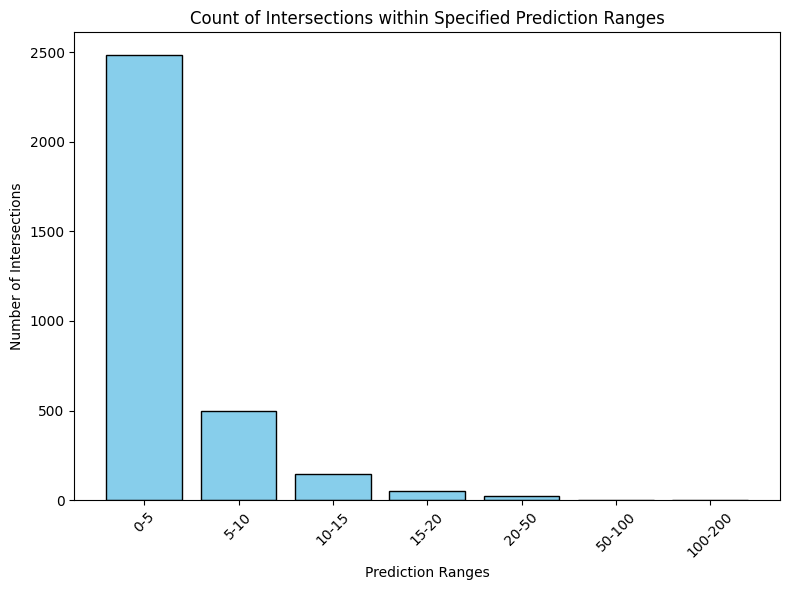

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Define prediction ranges and bin intervals
bins = [0, 5, 10, 15, 20, 50, 100, 200]  # You can adjust these ranges
labels = ['0-5','5-10', '10-15', '15-20', '20-50', '50-100', '100-200']

# Add a new column for binning data into prediction ranges
intersection_ranking_df['Prediction Range'] = pd.cut(
    intersection_ranking_df['Total Predictions'],
    bins=bins,
    labels=labels,
    right=False
)

# Count the intersections in each range
range_counts = intersection_ranking_df['Prediction Range'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(range_counts.index.astype(str), range_counts.values, color='skyblue', edgecolor='black')
plt.title('Count of Intersections within Specified Prediction Ranges')
plt.xlabel('Prediction Ranges')
plt.ylabel('Number of Intersections')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
print(range_counts)
plt.show()

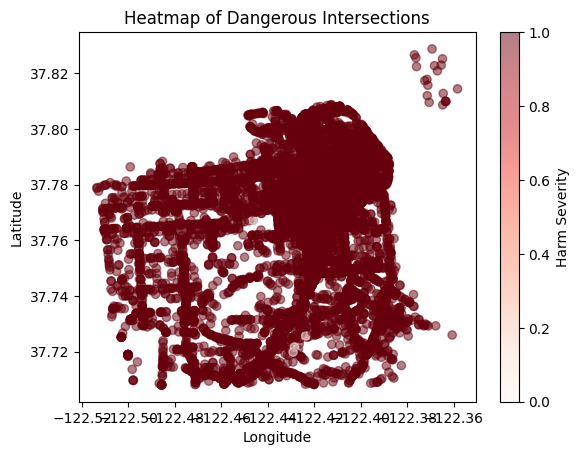

,Intersection ID,Total Predictions,Prediction Range
2815,30070000,31,20-50
658,22556000,27,20-50
1527,24922000,27,20-50
2838,30739000,27,20-50
2195,26621000,26,20-50
...,...,...,...
709,22882000,1,0-5
712,22910000,1,0-5
2315,26857000,1,0-5
692,22743000,1,0-5


In [63]:
import matplotlib.pyplot as plt

# Plot heatmap of dangerous intersections (if latitude/longitude is available)
plt.scatter(data['tb_longitude'], data['tb_latitude'], c=data['harm'], cmap='Reds', alpha=0.5)
plt.colorbar(label='Harm Severity')
plt.title('Heatmap of Dangerous Intersections')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

intersection_ranking_df

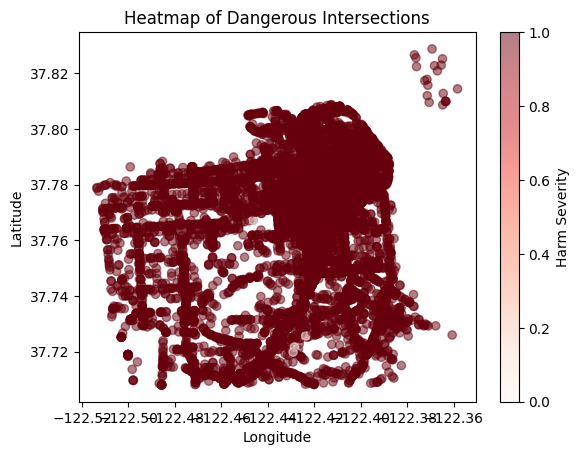

In [64]:
import matplotlib.pyplot as plt

# Plot heatmap of dangerous intersections (if latitude/longitude is available)
plt.scatter(data['tb_longitude'], data['tb_latitude'], c=data['harm'], cmap='Reds', alpha=0.5)
plt.colorbar(label='Harm Severity')
plt.title('Heatmap of Dangerous Intersections')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [65]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\dharm\Downloads\SEMESTER 3\DAB_311_DEEP_LEARNING\my_venv\Scripts\python.exe -m pip install --upgrade pip


In [67]:
model.save("my_model.keras")
#del model  
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Structured_Input    │ (None, 62)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Image_Input         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_expansion_… │ (None, 224, 224,  │          0 │ Structured_Input… │
│ (FeatureExpansionL… │ 62)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 224, 224,  │          0 │ Image_Input[0][0… │
│ (Concatenate)       │ 65)               │            │ feature_expansio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 222, 222,  │     18,752 │ concatenate_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 111, 111,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 54, 54,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 186624)    │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │ 23,888,000 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 2)         │        258 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 71,776,520 (273.81 MB)

 Trainable params: 23,925,506 (91.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,851,014 (182.54 MB)